<a href="https://colab.research.google.com/github/22-Aditya/Air_Pollution_Predicition/blob/main/Air_Pollution_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [ ]:
df = pd.read_csv('/content/Train.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature_1  1600 non-null   float64
 1   feature_2  1600 non-null   float64
 2   feature_3  1600 non-null   float64
 3   feature_4  1600 non-null   float64
 4   feature_5  1600 non-null   float64
 5   target     1600 non-null   float64
dtypes: float64(6)
memory usage: 75.1 KB


In [ ]:
df.describe()

,feature_1,feature_2,feature_3,feature_4,feature_5,target
count,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000
mean,0.004114,-0.027604,-0.044459,-0.042408,0.012005,0.318835
std,0.997338,1.021776,1.011768,1.017189,0.978654,110.741562
min,-3.380125,-3.314844,-3.153118,-3.250169,-2.851707,-379.829794
25%,-0.647165,-0.705030,-0.706385,-0.709504,-0.615880,-71.897040
50%,-0.000360,-0.043769,-0.041272,-0.029756,-0.013527,-0.610665
75%,0.682118,0.645442,0.639130,0.646290,0.650089,71.226603
max,3.287205,3.438895,3.216176,2.985410,3.321770,337.643014


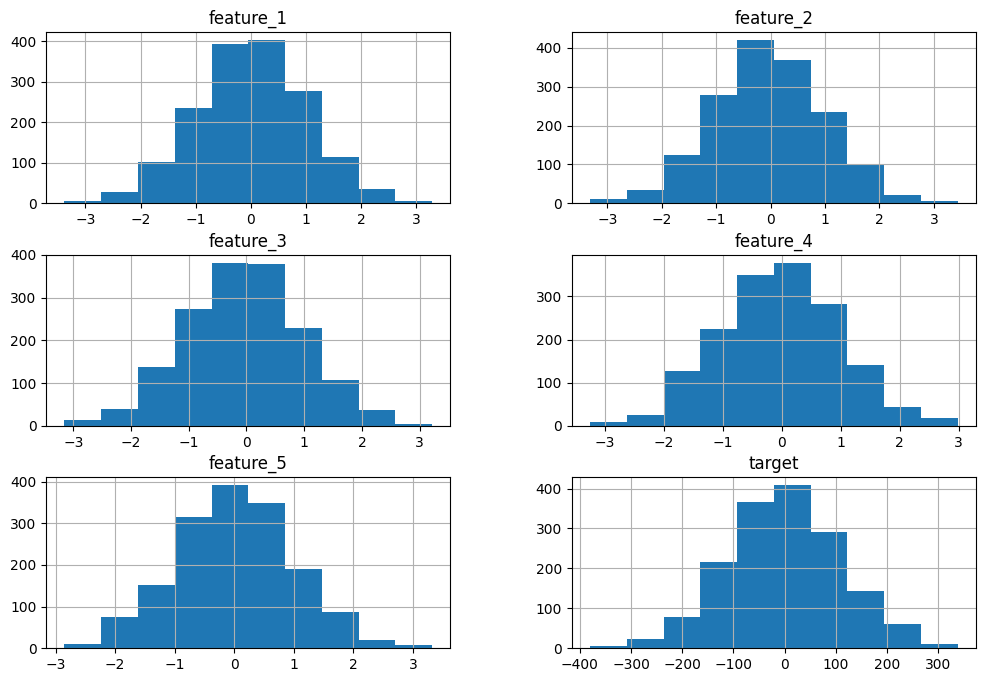

In [ ]:
df.hist(figsize = (12,8))
plt.show()

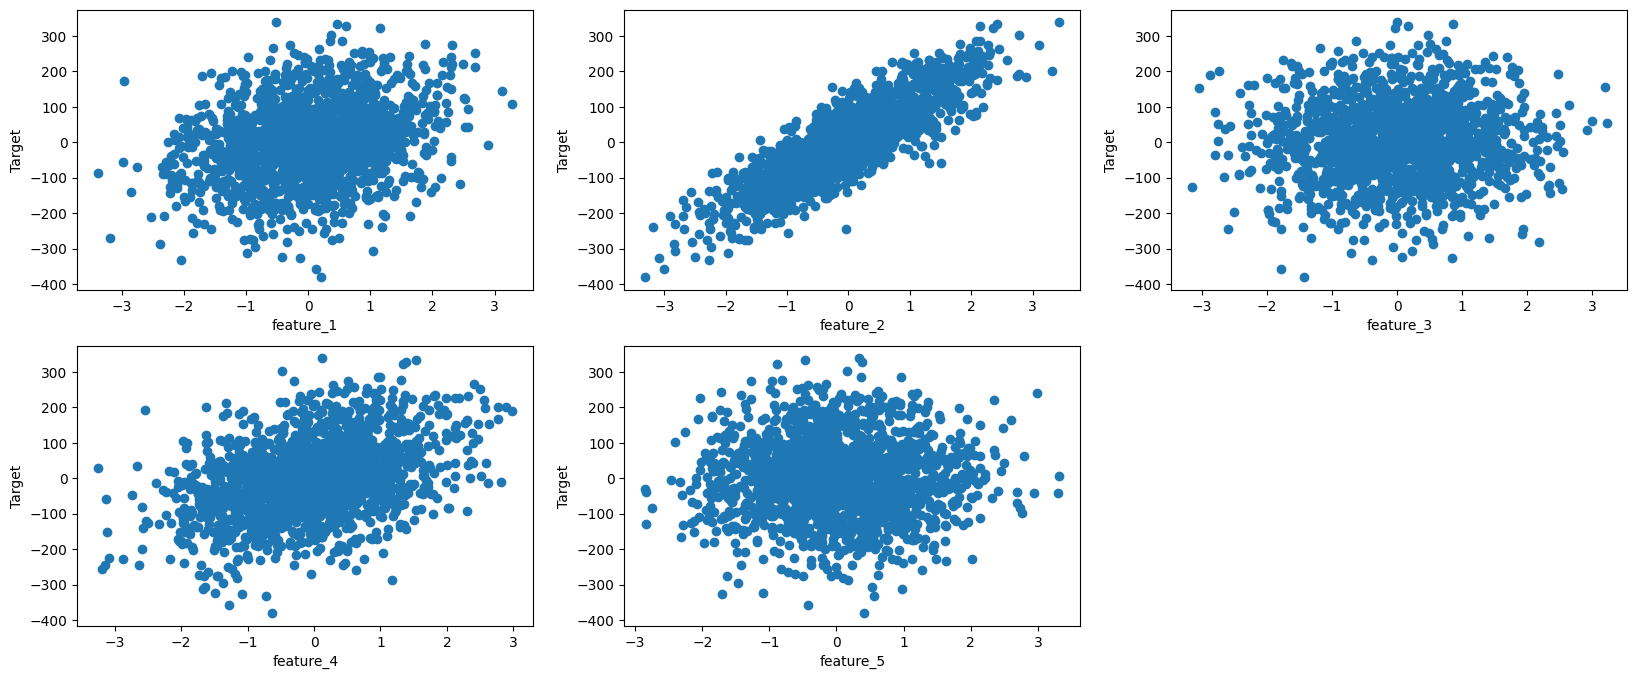

In [ ]:
plt.figure(figsize=(20,8))
for i, column in enumerate(df.columns):
    if column != 'target':
      plt.subplot(2,3,i+1)
      plt.scatter(x=df[column], y=df['target'])
      plt.xlabel(column)
      plt.ylabel('Target')

<Axes: >

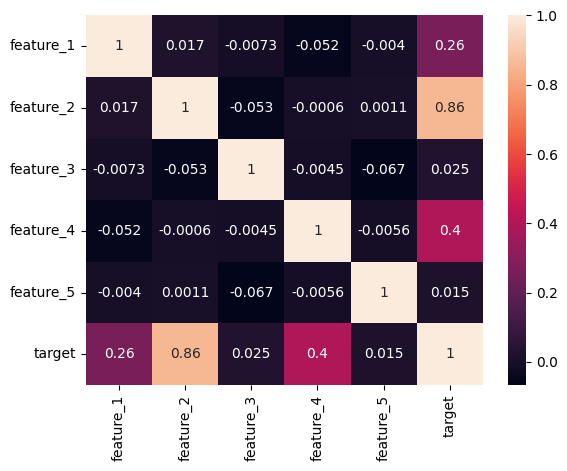

In [ ]:
import seaborn as sns

corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot= True)

In [ ]:
X = df.drop('target', axis=1)
Y = df['target']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3)

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train , Y_train)

LinearRegression()

In [ ]:
lr_pre = lr.predict(X_test)

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(Y_test , lr_pre)
rmse = np.sqrt(mse)

print('The mean square error is {:.3f}'.format(mse))
print('The root mean square error is {:.3f}'.format(rmse))

The mean square error is 414.854
The root mean square error is 20.368


In [ ]:
predicted_df = pd.concat([X_test, Y_test], axis=1)
predicted_df['Presicted_target'] = lr_pre

In [ ]:
predicted_df = predicted_df.reset_index().drop('index',axis=1)
predicted_df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,target,Presicted_target
0,0.945050,-0.054660,-0.130864,-0.626284,0.011235,-3.206244,-1.259700
1,-1.458809,0.538447,-0.636575,1.726924,-1.345753,37.317529,80.604152
2,-0.462930,-0.142513,1.110874,-1.008688,-1.552909,-42.170420,-61.953366
3,-1.402200,1.429076,1.566583,0.287021,0.805391,107.839937,124.103942
4,2.018990,-0.207419,1.910309,-0.028157,-0.200428,84.860908,59.445599


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the regressor on the training data
rf_regressor.fit(X_train, Y_train)

# Make predictions on the testing data
rf_pred = rf_regressor.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(Y_test, rf_pred)
rmse_rf = np.sqrt(mse_rf)

print('Random Forest:')
print('Mean Square Error: {:.3f}'.format(mse_rf))
print('Root Mean Square Error: {:.3f}'.format(rmse_rf))

# Combine the test data, actual target values, and predicted target values into a DataFrame
predicted_df_rf = pd.concat([X_test, pd.Series(Y_test, name='Actual_target'), pd.Series(rf_pred, name='Predicted_target')], axis=1)

# Display the first few rows of the predicted DataFrame
predicted_df_rf.head()

Random Forest:
Mean Square Error: 743.111
Root Mean Square Error: 27.260


,feature_1,feature_2,feature_3,feature_4,feature_5,Actual_target,Predicted_target
581,0.945050,-0.054660,-0.130864,-0.626284,0.011235,-3.206244,NaN
1259,-1.458809,0.538447,-0.636575,1.726924,-1.345753,37.317529,NaN
1389,-0.462930,-0.142513,1.110874,-1.008688,-1.552909,-42.170420,NaN
1475,-1.402200,1.429076,1.566583,0.287021,0.805391,107.839937,NaN
1377,2.018990,-0.207419,1.910309,-0.028157,-0.200428,84.860908,NaN
